# Introduction

Breast cancer is one of the most common cancer types among women, and early detection can be a lifesaving health concern. This study aims to explore the potential of an artificial intelligence-based approach in breast cancer diagnosis.


<font color='Blue'>
Content:

0. [Import libraries](#imports)
1. [Load and Check Data](#1)
2. [Data Visualization](#2)
3. [Correlation Matrix](#corelation-matrix)
4. [Splitting and Scaling the Data](#3)
5. [Create ANN model](#4)
6. [Compiling and Fitting](#5)

# Imports

Lets Import the libraries we shall need .. And Let's DO IT !!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU,PReLU,ELU
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model

<a id='1'></a><br>
# Load and Check Data

In [2]:
df = pd.read_csv(r"C:\Users\samer\Desktop\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

*We will drop unnamed column*

In [8]:
df=df.drop(["Unnamed: 32","id"],axis=1)

In [9]:
df.shape

(569, 31)

In [10]:
print(df['diagnosis'].unique())

['M' 'B']


### Encoding

In [11]:
diagnosis_mapping = {"M": 1, "B": 0}

df["diagnosis"] = df["diagnosis"].map(diagnosis_mapping)

<a id='2'></a>
# Data Visualization


C:\Users\samer\AppData\Local\Temp\ipykernel_6552\3585137742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=df, palette=colors)


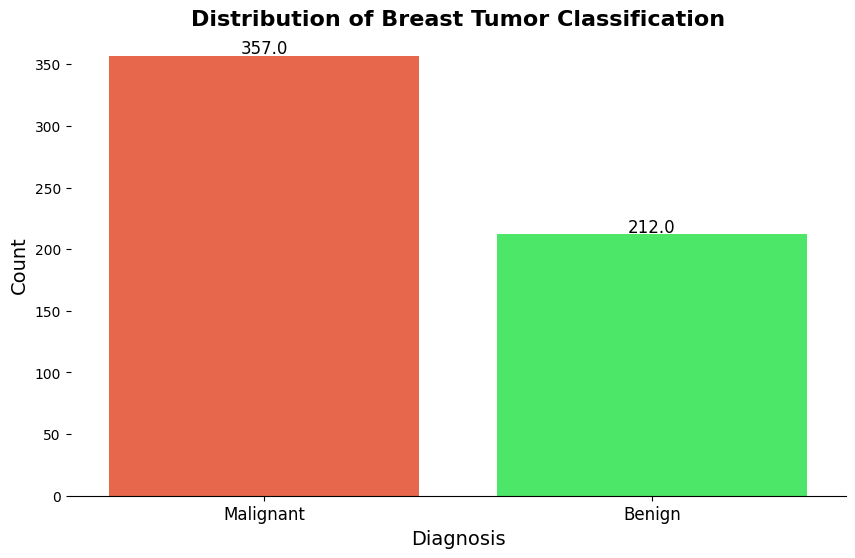

In [12]:
colors = ['#FF5733', '#33FF57']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df, palette=colors)

plt.title('Distribution of Breast Tumor Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Malignant', 'Benign'], fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# Correlation Matrix :
A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. The main diagonal of the matrix (from the top left to the bottom right) represents the correlation of each variable with itself, which is always 1.
It helps us on Feature Selection.

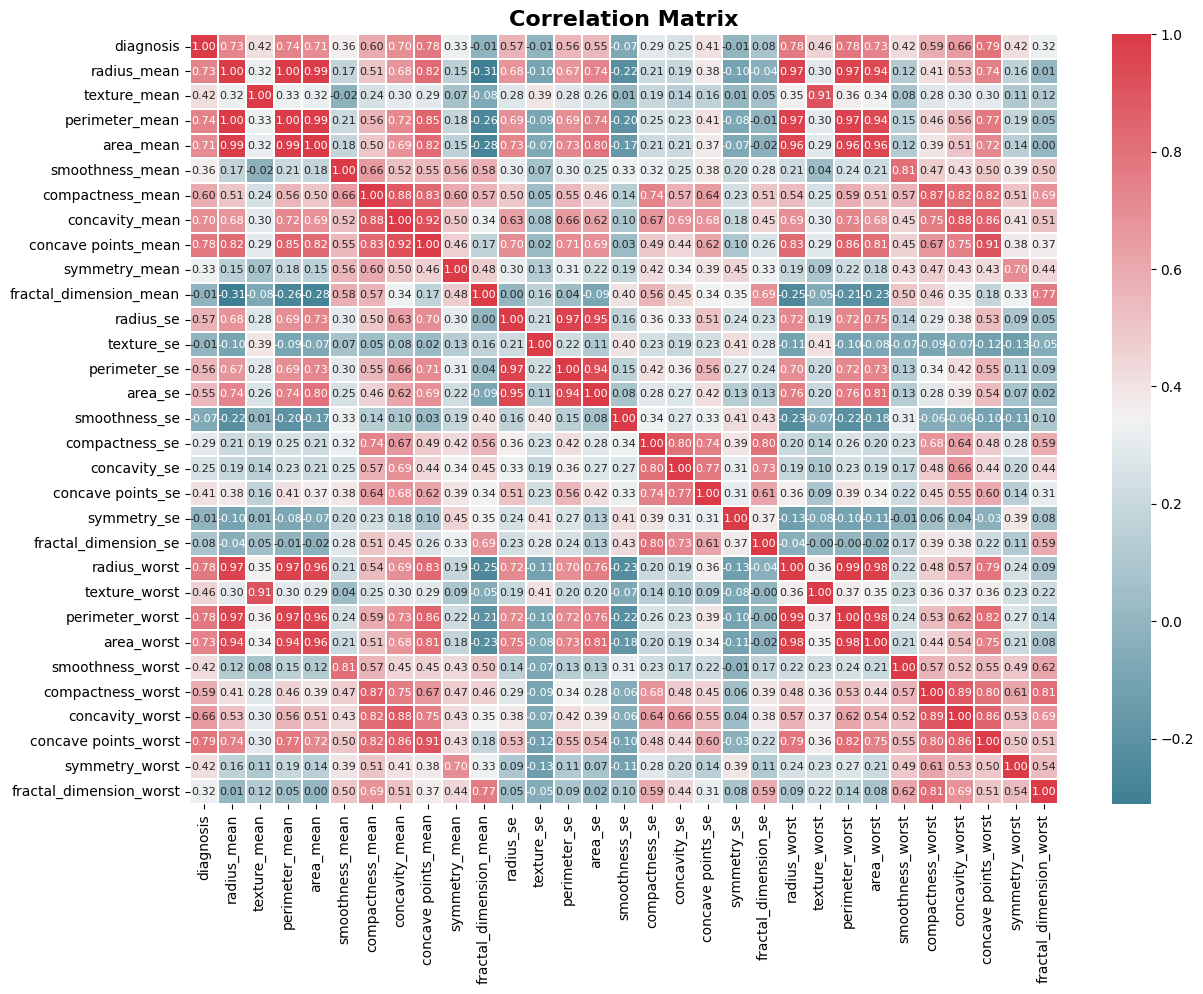

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f",annot_kws={'size': 8}, linewidths=.1)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()

<a id='3'></a>
# Splitting Data

In [14]:
y=df.diagnosis
x=df.drop("diagnosis",axis=1)

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [16]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

# Scaling the Data
The StandardScaler is used to preprocess the data, making it more amenable to certain machine learning algorithms and improving the overall performance and convergence of the models.
Calculates the mean and standard deviation of each feature in the training data ("xtrain") and then standardizes the data based on these statistics. The result is that each feature in "xtrain" has a mean of 0 and a standard deviation of 1.

In [18]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

<a id='4'></a>
# Create ANN model

In [19]:
model = Sequential([
    Dense(30, activation="relu", name="layer1"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation="relu", name="layer2"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid", name="layer3"),
])

<a id='5'></a>
# Compiling and Fitting

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
m=model.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])


Epoch 1/100


15/15 [==============================] - 3s 24ms/step - loss: 0.8432 - accuracy: 0.5824 - val_loss: 0.5203 - val_accuracy: 0.7982
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6304 - accuracy: 0.6901 - val_loss: 0.4243 - val_accuracy: 0.8947
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7429 - val_loss: 0.3624 - val_accuracy: 0.9298
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4408 - accuracy: 0.7978 - val_loss: 0.3110 - val_accuracy: 0.9561
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.8022 - val_loss: 0.2684 - val_accuracy: 0.9649
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8220 - val_loss: 0.2386 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.8637 - val_loss: 0.2145 - val_accuracy: 0.9737
Epoch 8/1

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 30)                930       
                                                                 
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 layer2 (Dense)              (None, 15)                465       
                                                                 
 batch_normalization_1 (Bat  (None, 15)                60        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 15)                0

<Axes: >

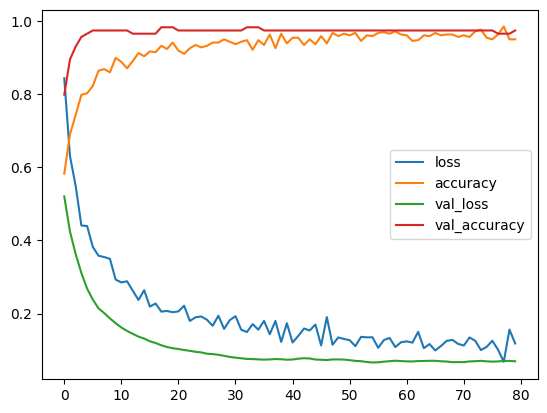

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [23]:
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 2ms/step


In [24]:
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[74  1]
 [ 2 37]]
score is: 0.9736842105263158


In [25]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



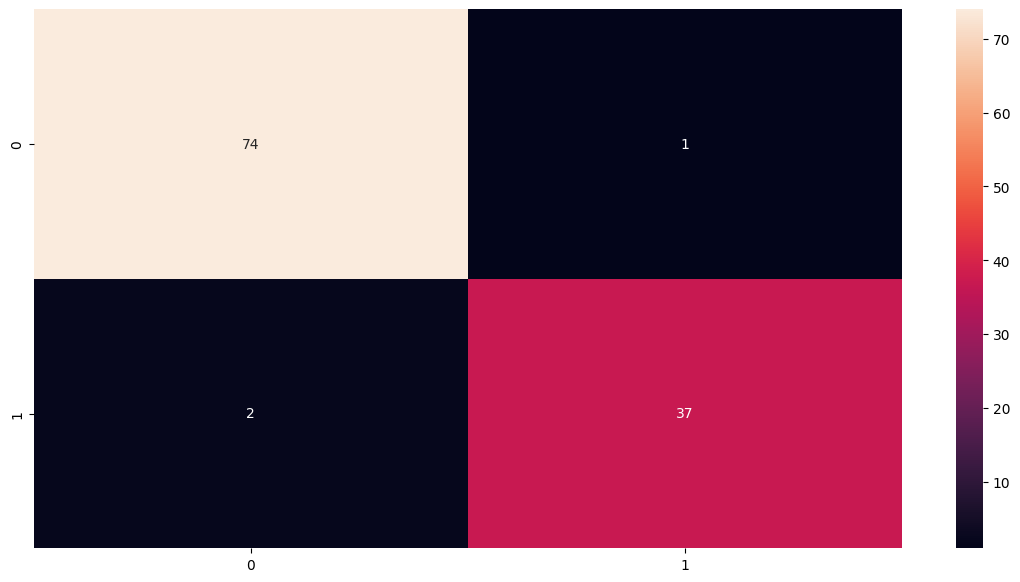

In [26]:
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

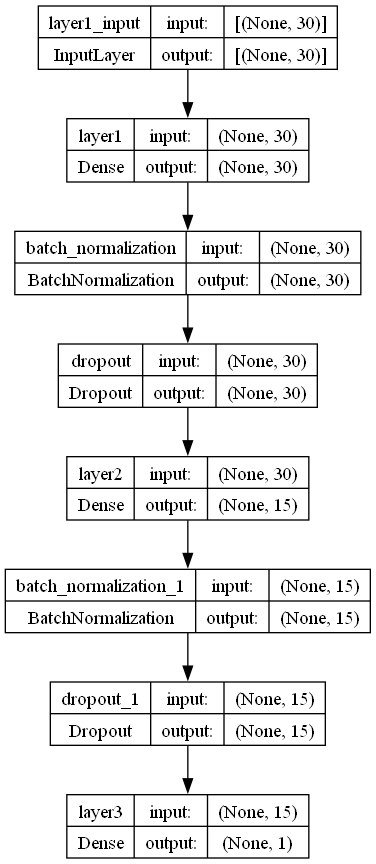

In [27]:
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)